In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time
import random
# from tqdm.notebook import tqdm

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import ResNet as net_regular

    
import Resnet_multiscale_general_examine_training as net


mse_list = list()
step_size_list = list()
noise_list = list()
t_list_all = list()


In [2]:
len_all_combos = 1317
num_paths_per_cycle = 50
num_cycles = len_all_combos // num_paths_per_cycle + 1
print(num_cycles)
epoch = 26
print((epoch % num_cycles) * num_paths_per_cycle)
print(min((epoch % num_cycles+1) * num_paths_per_cycle, len_all_combos))

27
1300
1317


In [3]:
#===========================================================================================================

# adjustables

k = 2                       # model index: should be in {0, 2, ..., 10}
dt = 0.02                     # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'Cos'         # system name: 'Hyperbolic', 'Cubic', 'VanDerPol', 'Hopf' or 'Lorenz'
# system = 'Lorenz'

step_size = 4
noise = 0.02                  # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epoch = 50000            # the maximum training epoch 
batch_size = 320              # training batch size
arch = [2, 512, 512, 512, 2]  # architecture of the neural network

# paths
data_dir = os.path.join('../../data/', system,)
model_dir = '../../models/Cos_examine'
# model_dir = '../../models/Lorenz_multiscale_general'

# global const
n_forward = 6
# step_size = 2**k


        
# load data
train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))
val_data = np.load(os.path.join(data_dir, 'val_noise{}.npy'.format(noise)))
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
n_train = train_data.shape[0]
n_val = val_data.shape[0]
n_test = test_data.shape[0]

print("train_data shape = ", train_data.shape)
print("val_data shape = ", val_data.shape)
print("test_data.shape = ", test_data.shape)

# n_forward = int(64/4)

# dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)

# print(dataset.train_ys.shape)

train_data shape =  (3200, 4993, 128)
val_data shape =  (320, 4993, 128)
test_data.shape =  (320, 4993, 128)


In [185]:
# load models
models = list()
#add letter models and the one without a letter. 
# model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
# models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))

step_size = 4
model_number = 44
for num in [model_number]:#letter in  ['a']:#'a', 'b', 'c', 'd', 'e']:
    # for noise in noise_levels:
#     try:
        model_name = 'model_again_D'+str(step_size)+'_n' + str(noise)+'_{}.pt'.format(num)
        print(model_name)
        print(os.path.join(model_dir, model_name))
        models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))
#     except:
#         print("not found")
#         break

for model in models:
    # fix model consistencies trained on gpus (optional)
    model.device = 'cpu'
    for step_size_this in model.step_sizes:
        model._modules[str(step_size_this)]._modules['activation'] = torch.nn.ReLU()
#     model._modules['large']._modules['activation'] = torch.nn.ReLU()
  

model_again_D4_n0.02_44.pt
../../models/Cos_examine/model_again_D4_n0.02_44.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [186]:
# load models
models_regular = list()
model_dir_regular = '../../models/Cos'
# model_dir_regular = '../../models/Lorenz'
#add letter models and the one without a letter. 
# model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
# models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))

for step_size_this in [step_size,2*step_size,4*step_size]:
    # for noise in noise_levels:
    try:
        model_name = 'model_D{}_noise{}.pt'.format(step_size_this, noise)
        print(model_name)
        models_regular.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
    except:
        print("not found")
        break

for model in models_regular:
    # fix model consistencies trained on gpus (optional)
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()
  

model_D4_noise0.02.pt
model_D8_noise0.02.pt
model_D16_noise0.02.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [187]:
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
print(test_data.shape)

(320, 4993, 128)


In [188]:
#want to find mse when just considering the smaller timescale

def predict_single_scale(model1, step_size, test_data=test_data, timesteps = 5000, size='small', to_plot=True):

    t = 0
    print(step_size)
    size = str(step_size)

    n_timepoints = timesteps // step_size + 1
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), size)
    y_pred_list[:,0] = y_preds.detach().numpy()
    t_list[0] = t
    print(y_preds.shape)

    for j in range(n_timepoints-1):
        t+= step_size
        y_preds = model1.forward(y_preds, size)

        y_pred_list[:,j+1] = y_preds.detach().numpy()
        t_list[j+1] = t

    
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((n_test_points, timesteps - step_size, ndim))
    t_list_new = np.arange(step_size, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)
    
    plt_idx = 1
    
    if to_plot:

        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 1])
        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 0])
        plt.ylim([-2,2])
#         plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 2])

        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])
#         plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 2])
        plt.title("At step " + str(model_number)+": step_size = " + str(step_size)+ ": noise = "+ str(noise))

        plt.show()
    
    mse = np.mean((y_pred_list_new[:,:,:1] - test_data[:,t_list_new.astype(int),:1])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list_new, mse)
        plt.title("At step " + str(model_number)+": step_size = " + str(step_size)+ ": noise = "+ str(noise))
        plt.show()
    
    
    return y_pred_list_new, mse, t_list_new
 




4
torch.Size([320, 128])


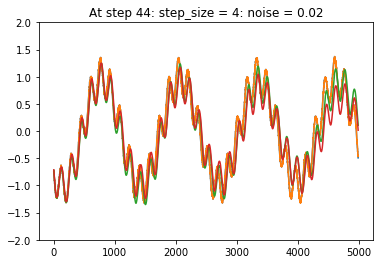

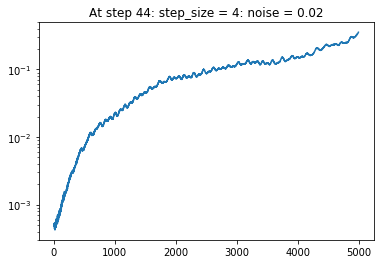

8
torch.Size([320, 128])


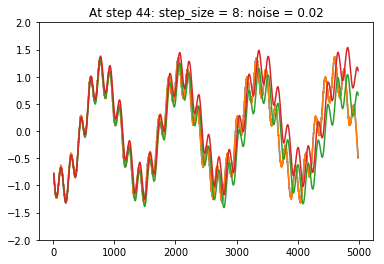

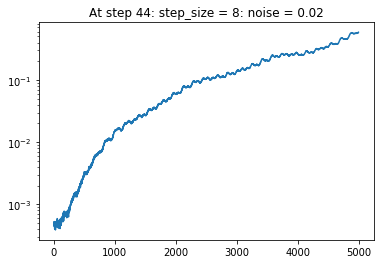

16
torch.Size([320, 128])


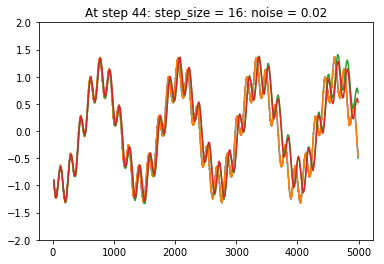

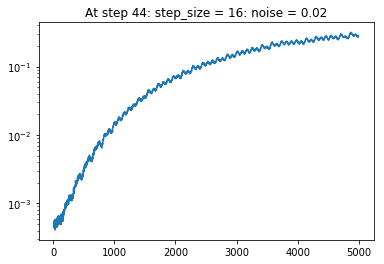

In [189]:
to_plot = True
n_timesteps = 4993
y_pred_list_small, mse_small, t_list_small = predict_single_scale(models[0], step_size, test_data=test_data, timesteps = n_timesteps, 
                                                            size=str(step_size), to_plot=to_plot)
y_pred_list_mid, mse_mid, t_list_mid = predict_single_scale(models[0], 2*step_size, test_data=test_data, timesteps = n_timesteps, 
                                                            size=str(step_size*2),to_plot=to_plot)
y_pred_list_large, mse_large, t_list_large = predict_single_scale(models[0], 4*step_size, test_data=test_data, timesteps = n_timesteps, 
                                                                  size=str(step_size*4),to_plot=to_plot)

# y_pred_list_small, mse_small, t_list = predict_single_scale(models[0], 64, test_data=test_data, timesteps = n_timesteps, 
#                                                             size='64', to_plot=to_plot)
# y_pred_list_mid, mse_mid, t_list_mid = predict_single_scale(models[0], 128, test_data=test_data, timesteps = n_timesteps, 
#                                                             size='128',to_plot=to_plot)
# y_pred_list_large, mse_large, t_list_large = predict_single_scale(models[0], 256, test_data=test_data, timesteps = n_timesteps, 
#                                                                   size="256",to_plot=to_plot)


(-2, 2)

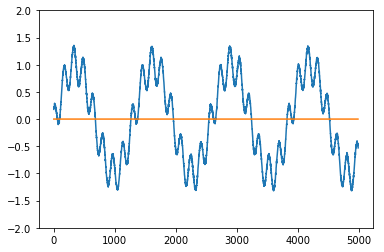

In [190]:
idx = 4
idx_dim = 2
plt.plot(test_data[idx,1:,idx_dim])
plt.plot(y_pred_list_small[idx,:,idx_dim])

plt.ylim([-2,2])

# print(test_data.shape)
# print(test_data[:,t_list_small].shape)

# mse = np.mean((y_pred_list_small[:,:,-1] - test_data[:,t_list_small,-1])**2, axis = (0))
# plt.semilogy(mse)


In [191]:
n_steps=4991
y_preds_uni_small = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse_uni_small = torch.mean((y_preds_uni_small - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))


y_preds_uni_mid = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse_uni_mid = torch.mean((y_preds_uni_mid - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))


y_preds_uni_large = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse_uni_large = torch.mean((y_preds_uni_large - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))


/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))


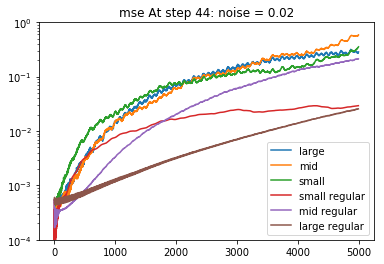

In [192]:

plt.semilogy(t_list_large, mse_large, label = "large")
plt.plot(t_list_mid, mse_mid, label = "mid")
plt.plot(t_list_small, mse_small, label = "small")
plt.title("mse At step " + str(model_number)+": noise = " + str(noise))

# plt.xlim([0,1000])
plt.ylim([0.0001, 1])



plt.plot(mse_uni_small, label = "small regular")
plt.plot(mse_uni_mid, label = "mid regular")
plt.plot(mse_uni_large, label = "large regular")
plt.legend()

# y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
# mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.semilogy(mse_regular, label = " multiscale regular")

plt.legend()

(-2, 2)

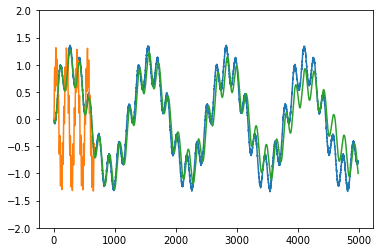

In [193]:
# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)



plt.plot(test_data[0,:,0])
# plt.plot(test_data[0,:,1])

plt.plot(y_preds[0,:,0])
# plt.plot(y_preds[0,:,1])


# plt.plot(test_data[0,:,0])
# plt.plot(test_data[0,:,1])

plt.plot(t_list_small, y_pred_list_small[0,:,0])
# plt.plot(t_list_small, y_pred_list_small[0,:,1])
plt.ylim([-2,2])


In [194]:
#making it so we can consider any path to get there 
#need all the path combos 

all_combos = np.load('all_combos_'+str(step_size)+'.npy', allow_pickle=True)
print(all_combos)

[(4, 4) (8,) (4, 4, 4) ... (16, 16, 8, 16, 8) (16, 16, 16, 8, 8)
 (16, 16, 16, 16)]


In [195]:
#pick a random combo


#want to find mse when just considering the smaller timescale

def predict_random_combo(model1, test_data=test_data, timesteps = 5000, to_plot=True):

    t = 0
    
    idx_combo = random.sample(range(len(all_combos)), 1)
    path = all_combos[idx_combo[0]]
    print(path)
    
    steps_per_combo = sum(path)

    path_loops = timesteps // steps_per_combo + 1
    
#     print("path_loops = ", path_loops)
    n_timepoints = path_loops * len(path)
#     print("n_steps = ", n_timepoints)
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

    this_step_size = path[0]
    t+= this_step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), str(this_step_size))
    y_pred_list[:,0] = y_preds.detach().numpy()
    t_list[0] = t
#     print(y_preds.shape)

    for j in range(n_timepoints-1):
        this_step_size = path[j%len(path)]
        t+= this_step_size
        y_preds = model1.forward(y_preds, str(this_step_size))

        y_pred_list[:,j+1] = y_preds.detach().numpy()
        t_list[j+1] = t
        
    if to_plot:
        plt.plot(t_list, y_pred_list[0,:,0])
        plt.plot(t_list, test_data[0,t_list.astype(int), 0])
        plt.show()
    
    mse = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list, mse)
        plt.show()
    
    return y_pred_list, mse, t_list, path
    hjk

    
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((n_test_points, timesteps - step_size, ndim))
    t_list_new = np.arange(step_size, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)
    
    plt_idx = 1
    
    if to_plot:

        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 1])
        plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 0])
#         plt.plot(t_list_new, test_data[plt_idx,t_list_new.astype(int), 2])

        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
        plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])
#         plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 2])
        plt.title("step_size = " + str(step_size)+ ": noise = "+ str(noise))

        plt.show()
    
    mse = np.mean((y_pred_list_new - test_data[:,t_list_new.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list_new, mse)
        plt.title("step_size = " + str(step_size)+ ": noise = "+ str(noise))
        plt.show()
    
    
    return y_pred_list_new, mse, t_list_new
 
num_lines = 50
mse_list = list()
t_list_list = list()
path_list = list()

for i in range(num_lines):
    y_preds, mse, t_list, path = predict_random_combo(models[0], to_plot = False, timesteps = 4900) 
    mse_list.append(mse)
    t_list_list.append(t_list)
    path_list.append(path)



(4, 4, 8, 4, 16, 8)
(8, 16, 4, 4, 8)
(16, 8, 4, 8, 8, 4, 16)
(4, 8, 4, 16, 4)
(8, 8, 8, 16, 4, 16)
(8, 8, 8, 4, 4, 16)
(4, 8, 16, 4, 8, 8)
(8, 16, 8, 4, 4)
(4, 16, 8, 8, 8, 16)
(4, 8, 16, 4, 16, 8, 4)
(4, 16, 8, 4, 16)
(4, 8, 16, 8, 4, 4, 8)
(16, 4, 4, 16, 8, 4, 8)
(16, 4, 16, 16, 8)
(8, 4, 4, 8, 16, 4, 16)
(8, 4, 4, 16, 8, 4, 8)
(8, 16, 4, 4, 16, 4)
(4, 8, 8, 16, 8)
(8, 16, 8, 4, 4, 4, 8)
(8, 16, 8, 4, 4, 4, 16)
(4, 16, 16, 16, 4, 8)
(16, 8, 16, 4)
(16, 8)
(8, 16, 8, 16, 8, 4)
(16, 8, 8, 4, 4, 8, 16)
(8, 4, 16, 8, 8)
(8, 16, 4, 4, 4, 8, 8)
(4, 8, 4, 4, 16, 8)
(16, 8, 16, 4, 4)
(16, 16, 8, 8, 4)
(8, 8, 4, 4, 16, 4, 16)
(8, 4, 8, 4, 8, 4)
(4, 8, 16, 8, 16, 8)
(16, 16, 4, 8, 4, 8, 4)
(4, 8, 16, 16)
(4, 8, 8, 8, 4)
(16, 8, 8, 4, 4, 16, 4)
(8, 4, 16, 16, 8, 8)
(16, 8, 8, 4)
(8, 16, 16, 16, 4, 4)
(8, 8, 8, 4, 16, 4)
(16, 16, 4, 4, 8, 4, 8)
(8, 16, 8, 4, 16, 4)
(4, 4, 8, 16, 16, 8, 8)
(4, 8, 8, 16, 4, 16, 8)
(16, 4, 8, 4, 16, 8, 4)
(4, 8, 16, 4, 16, 16)
(8, 16, 8, 16, 4)
(8, 8, 4, 4, 4, 16, 

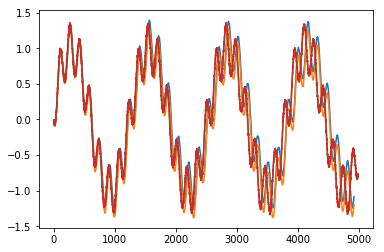

In [196]:
plt.plot(t_list, y_preds[0,:,0])
plt.plot(t_list, y_preds[0,:,1])

plt.plot(test_data[0,:,0])
plt.plot(test_data[0,:,1])

Text(0.5,1,'Test mse with different paths: small step_size = 4: noise = 0.02')

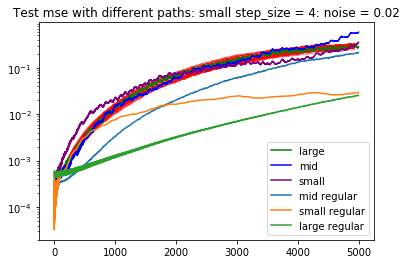

In [197]:
for i in range(len(mse_list)):
    plt.semilogy(t_list_list[i], mse_list[i], 'r', linewidth = 0.5)#, label = path_list[i])
    
plt.semilogy(t_list_large, mse_large, 'g',  label = "large")
plt.plot(t_list_mid, mse_mid, 'b' , label = "mid")
plt.plot(t_list_small, mse_small, 'purple', label = "small")

plt.plot(mse_uni_mid, label = "mid regular")
plt.plot(mse_uni_small, label = "small regular")
plt.plot(mse_uni_large, label = "large regular")

plt.legend()
plt.title("Test mse with different paths: small step_size = " + str(step_size) + ": noise = " +str(noise) )

# plt.ylim([1e-4, 10])

# n_steps=5000
# y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "small regular")

# y_preds = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "mid regular")

# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, 'g', linewidth = 0.5, label = "large regular")
# plt.legend()

# plt.xlim([0,1000])
    

NameError: name 't_list1' is not defined

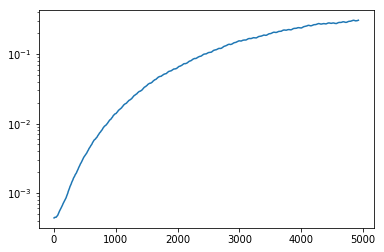

In [198]:
plt.semilogy(t_list, mse, label = 'first')
plt.plot(t_list1, mse1, label = 'second')

plt.semilogy(t_list_large, mse_large, label = "large")
plt.plot(t_list_mid, mse_mid, label = "mid")
plt.plot(t_list_small, mse_small, label = "small")
plt.legend()
# plt.title("mse general: noise = " + str(noise))


    

# plt.xlim([0,1000])

In [ ]:
#pick a random combo and use that to predict from regular training

#want to find mse when just considering the smaller timescale

def predict_random_combo_regular(models, step_sizes = [4,8,16], test_data=test_data, timesteps = 4900, to_plot=True):

    t = 0
    
    idx_combo = random.sample(range(len(all_combos)), 1)
    path = all_combos[idx_combo[0]]
    print(path)
    
    steps_per_combo = sum(path)

    path_loops = timesteps // steps_per_combo + 1
    
#     print("path_loops = ", path_loops)
    n_timepoints = path_loops * len(path)
#     print("n_steps = ", n_timepoints)
    
    n_test_points, _, ndim = test_data.shape


    t_list = np.zeros(n_timepoints)
    y_pred_list = np.zeros((n_test_points, n_timepoints, ndim))

#     this_step_size = path[0]
#     t+= this_step_size
    y_preds = torch.tensor(test_data[:, 0]).float()
#     y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), str(this_step_size))
#     y_pred_list[:,0] = y_preds.detach().numpy()
#     t_list[0] = t
#     print(y_preds.shape)

    for j in range(1, n_timepoints):
        this_step_size = path[j%len(path)]
        t+= this_step_size
        if this_step_size == 4:
            y_preds = models[0].forward(y_preds)
        elif this_step_size == 8:
            y_preds = models[1].forward(y_preds)
        else:
            y_preds = models[2].forward(y_preds)

        y_pred_list[:,j] = y_preds.detach().numpy()
        t_list[j] = t
        
    if to_plot:
        plt.plot(t_list, y_pred_list[0,:,0])
        plt.plot(t_list, test_data[0,t_list.astype(int), 0])
        plt.show()
    
    mse = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
    if to_plot:
        plt.semilogy(t_list, mse)
        plt.show()
    
    return y_pred_list, mse, t_list, path
    
num_lines = 50
mse_list = list()
t_list_list = list()
path_list = list()

for i in range(num_lines):
    y_preds, mse, t_list, path = predict_random_combo_regular(models_regular, to_plot = False)
    mse_list.append(mse)
    t_list_list.append(t_list)
    path_list.append(path)



Text(0.5,1,'Test mse with different paths on Regular: small step_size = 4: noise = 0.02')

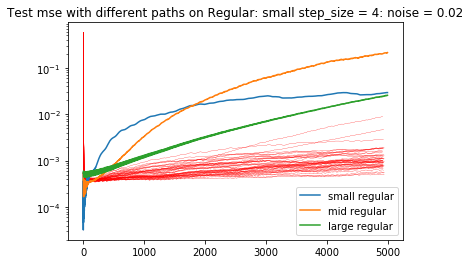

In [167]:
for i in range(len(mse_list)):
    plt.semilogy(t_list_list[i], mse_list[i], 'r', linewidth = 0.25)#, label = path_list[i])
    
plt.plot(mse_uni_small, label = "small regular")
plt.plot(mse_uni_mid, label = "mid regular")
plt.plot(mse_uni_large, label = "large regular")
plt.legend()

plt.title("Test mse with different paths on Regular: small step_size = " + str(step_size) + ": noise = " +str(noise) )
# plt.title("Test mse with different paths: Regular HiSTs")
    

In [115]:
def uni_scale_forecast(self, x_init, n_steps):
        """
        :param x_init: array of shape n_test x input_dim
        :param n_steps: number of steps forward in terms of dt
        :return: predictions of shape n_test x n_steps x input_dim and the steps
        """
        steps = list()
        preds = list()
        sample_steps = range(n_steps)

        # forward predictions
        x_prev = x_init
        cur_step = self.step_size - 1
        while cur_step < n_steps + self.step_size:
            print(x_prev.shape)
            x_next = self.forward(x_prev)
            steps.append(cur_step)
            preds.append(x_next)
            cur_step += self.step_size
            x_prev = x_next
            jk

        # include the initial frame
        steps.insert(0, 0)
        preds.insert(0, torch.tensor(x_init).float().to(self.device))

        # interpolations
        preds = torch.stack(preds, 2).detach().numpy()
        cs = scipy.interpolate.interp1d(steps, preds, kind='linear')
        y_preds = torch.tensor(cs(sample_steps)).transpose(1, 2).float()

        return y_preds
y_preds = uni_scale_forecast(models_regular[0], torch.tensor(test_data[:, 0]).float(), 50)
print(y_preds.shape)
y_preds = models_regular[0].forward(torch.tensor(test_data[:, 0]).float())

torch.Size([320, 2])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (320x2 and 3x1024)

/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))


(0, 1000)

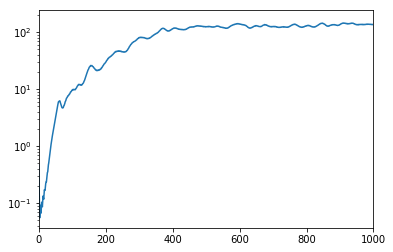

In [158]:
y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.semilogy(mse, label = "small regular")
plt.xlim([0,1000])

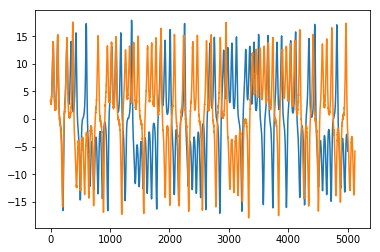

In [159]:
plt.plot(y_preds[0,:,0])
plt.plot(test_data[0,1:,0])

In [ ]:

plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list_mid, mse_mid, label = "mid")
plt.semilogy(t_list, mse_small, label = "small")

plt.xlim([0,1000])
# plt.ylim([0.0001, 1])

# n_steps=5000
# y_preds = models_regular[0].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "small regular")

# y_preds = models_regular[1].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "mid regular")

# y_preds = models_regular[2].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
# mse = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.plot(mse, label = "large regular")
# plt.legend()

# y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
# mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
# plt.semilogy(mse_regular, label = " multiscale regular")

plt.legend()

In [68]:
to_plot = False
y_pred_list_small, mse_small1, t_list = predict_single_scale(models[0], step_size, test_data=test_data, timesteps = 5000, 
                                                            size="small", to_plot=to_plot)
y_pred_list_large, mse_large1, t_list_large = predict_single_scale(models[0], step_size*4, test_data=test_data, timesteps = 5000, 
                                                                  size="large",to_plot=to_plot)
y_pred_list_mid, mse_mid1, t_list_mid = predict_single_scale(models[0], step_size*2, test_data=test_data, timesteps = 5000, 
                                                            size='mid',to_plot=to_plot)

plt.semilogy(t_list_large, mse_large, 'r', label = "large")
plt.semilogy(t_list_mid, mse_mid, 'orange', label = "mid")
plt.semilogy(t_list, mse_small, 'yellow', label = "small")
plt.legend()
plt.xlim([0,1000])
# plt.ylim([0.0001, 1])

256


KeyError: 'small'

NameError: name 'mse_small1' is not defined

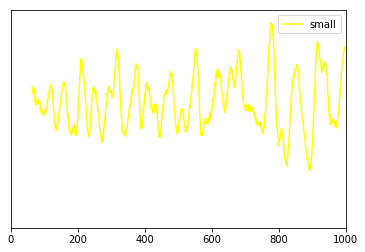

In [69]:
# plt.semilogy(t_list_large, mse_large, 'r', label = "large")
# plt.semilogy(t_list_mid, mse_mid, 'orange', label = "mid")
plt.semilogy(t_list, mse_small, 'yellow', label = "small")
plt.legend()
plt.xlim([0,1000])

# plt.semilogy(t_list_large, mse_large1, 'r--', label = "large")
# plt.semilogy(t_list_mid, mse_mid1, '--', color='orange', label = "mid")
plt.semilogy(t_list, mse_small1, '--', color='yellow', label = "small")

In [70]:
#want to find mse when just considering the both the smaller and larger timescales

def predict_all_3_scale(model1, step_size_small, test_data=test_data, timesteps = 5000):

    step_size_mid = step_size_small * 2
    step_size_large = step_size_small * 4
#     y_pred_list = list()
#     t_list = list()
    t = 0

    points = timesteps // step_size


    t_list = np.arange(step_size,timesteps+1, step_size)
    print(t_list)
    y_pred_list = torch.zeros((320, points, 2))
    
    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'small')
    y_pred_list[:,0] = y_preds#.detach().numpy()
#     t_list[0] = t
    print(y_preds.shape)
    
    t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'mid')
    y_pred_list[:,1] = y_preds
#     t_list[1] = t
    print(y_preds.shape)
    
#     t+= step_size
    y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), 'large')
    y_pred_list[:,3] = y_preds
#     t_list[1] = t
    print(y_preds.shape)

    #predict the large timesteps
    for j in range(7, points, 4):
        y_preds = model1.forward(y_preds, 'large')

        y_pred_list[:,j] = y_preds
        
    #predict the large timesteps
    for j in range(3, points, 4):
        y_preds = model1.forward(y_pred_list[:,j], 'mid')

        try:
            y_pred_list[:,j+2] = y_preds
        except:
            pass
        
    #then do small steps
    for j in range(1, points, 2):
#         t+= step_size
        y_preds = model1.forward(y_pred_list[:,j], 'small')

        try:
            y_pred_list[:,j+1] = y_preds
        except:
            pass
#         t_list[j+1] = t

    y_pred_list = y_pred_list.detach().numpy()
    # need to interpolate between timesteps
    y_pred_list_new = np.zeros((320, timesteps - step_size, 2))
    t_list_new = np.arange(step_size, timesteps)
    for i in range(len(y_pred_list)):
        for j in range(2):
            f = interp1d(t_list, y_pred_list[i,:,j])
            y_pred_list_new[i,:,j] = f(t_list_new)

    
    plt_idx = 1

#     plt.plot(t_list, y_pred_list[plt_idx,:, 1])
#     plt.plot(t_list, y_pred_list[plt_idx,:, 0])
    
    plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 1])
    plt.plot(t_list_new, y_pred_list_new[plt_idx,:, 0])

    plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
    plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])
    
    plt.show()

    print("t_list = ", t_list)
    # print(test_data[:,:804:4].shape)
    mse = np.mean((y_pred_list_new - test_data[:,t_list_new.astype(int)])**2, axis = (0,2))

    plt.semilogy(mse)
    
    plt.show()
    
    return y_pred_list_new, mse, t_list_new

# y_pred_list_small, mse_small, t_list = predict_small_scale(models[1], step_size, test_data=test_data, timesteps = 5000)
# y_pred_list_large, mse_large, t_list_large = predict_large_scale(models[1], step_size*2, test_data=test_data, timesteps = 5000)
y_pred_list, mse, t_list = predict_all_3_scale(models[0], step_size, test_data=test_data, timesteps = 5000)

plt.semilogy(t_list, mse_small, label = "small")

plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list, mse, 'k', label = "both")
plt.legend()
plt.xlim([0,1000])

[ 256  512  768 1024 1280 1536 1792 2048 2304 2560 2816 3072 3328 3584
 3840 4096 4352 4608 4864]


KeyError: 'small'

ValueError: x and y must have same first dimension, but have shapes (4936,) and torch.Size([5000])

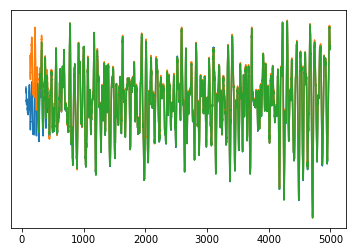

In [71]:
plt.semilogy(t_list, mse_small, label = "small")
plt.semilogy(t_list_mid, mse_mid, label = "mid")
plt.semilogy(t_list_large, mse_large, label = "large")
plt.semilogy(t_list, mse, 'k', label = "both")

plt.xlim([0,1000])

y_preds = net_regular.vectorized_multi_scale_forecast(torch.tensor(test_data[:, 0, :]).float().to('cpu'), n_steps=n_steps, models=models_regular)
mse_regular = torch.mean((y_preds - torch.tensor(test_data[:, 1:1+n_steps, :]).float())**2, axis = (0,2))
plt.plot(mse_regular, label = " multiscale regular")

plt.legend()

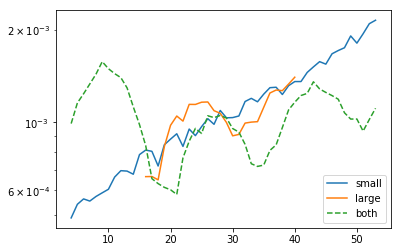

In [123]:
plt.semilogy(t_list[:50], mse_small[:50], label = "small")

plt.semilogy(t_list_large[:25], mse_large[:25], label = "large")
plt.semilogy(t_list[:50], mse[:50], '--', label = "both")
plt.legend()
# plt.xlim([0,200])

In [102]:
print(mse[:20])
print(mse_large[:10])

[0.00043857 0.00048595 0.00055374 0.00069042 0.00073694 0.00078642
 0.00097957 0.00108159 0.00136502 0.00150643 0.00168256 0.00191237
 0.00209405 0.00229929 0.00249592 0.00281474 0.00303126 0.0036193
 0.00409495 0.00461416]
[0.00048595 0.00069042 0.00078642 0.00108159 0.00150643 0.00191237
 0.00229929 0.00281474 0.0036193  0.00461416]


(320, 1250, 2)
(320, 625, 2)


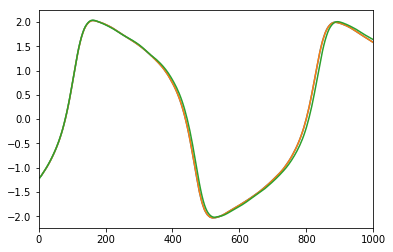

In [99]:
print(y_pred_list.shape)
print(y_pred_list_large.shape)
plt.plot(t_list[1:], y_pred_list[1,1:,0])
plt.plot(t_list_large, y_pred_list_large[1,:,0])
plt.plot(t_list, y_pred_list_small[1,:,0])
plt.xlim([0,1000])
plt.show()
# print(y_pred_list[0,::2,0].shape)
# print( y_pred_list_large[0,:,0].shape)
# plt.plot(y_pred_list[0,1::2,0]- y_pred_list_large[0,:,0])

In [89]:
print(y_pred_list[0,:10,0])
print(y_pred_list_large[0,:10,0])


[1.2760594 1.3328774 1.3878925 1.4327617 1.4744774 1.505684  1.5347683
 1.5559645 1.5757298 1.5860764]
[1.3328774  1.43276167 1.50568402 1.55596447 1.58607638 1.60540092
 1.61285377 1.61104465 1.60261405 1.58785665]


torch.Size([320, 2])


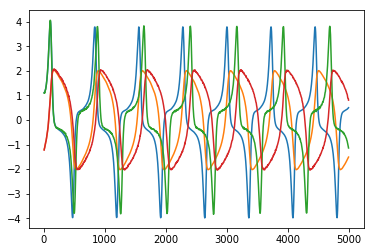

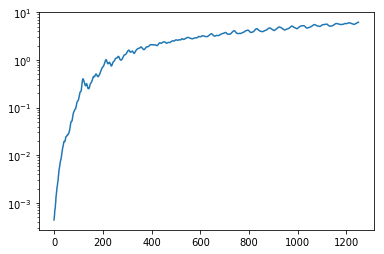

torch.Size([320, 2])


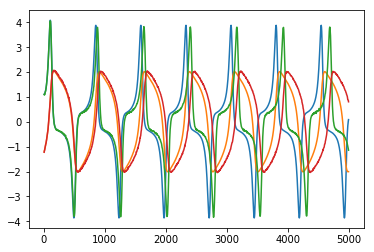

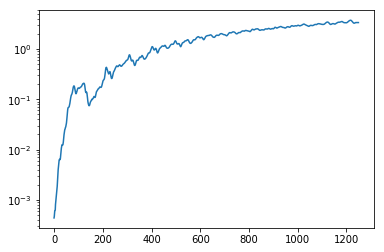

torch.Size([320, 2])


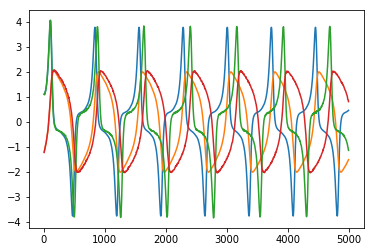

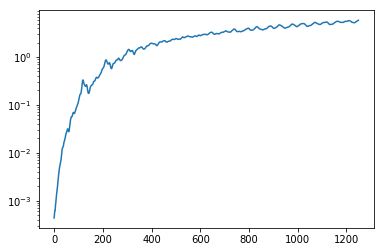

torch.Size([320, 2])


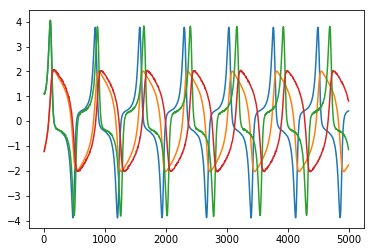

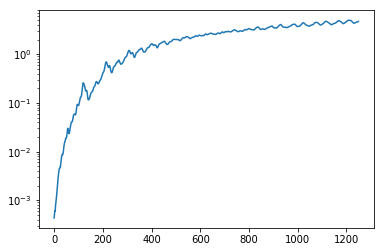

torch.Size([320, 2])


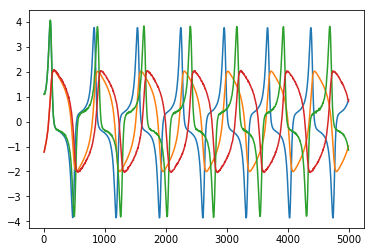

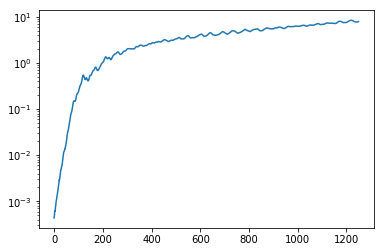

In [55]:
#predict all models
mse_list = list()
y_pred_list = list()
for model in models:
    y_preds, mse, t_list = predict_small_scale(model, step_size)
    mse_list.append(mse)

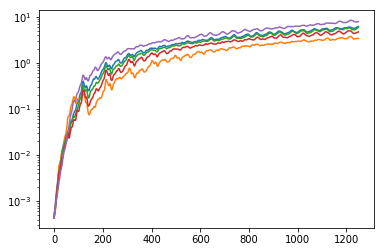

In [34]:
for mse in mse_list:
    plt.semilogy(mse)

In [35]:
#now want to plot the regular way with this one. 
import ResNet as net
test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
# load models
model_dir_regular = os.path.join('../../models/', system)
print(model_dir_regular)
# models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    model_regular = torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu')
except:
    print("not found")
#     break

# # fix model coistencies trained on gpus (optional)
model_regular.device = 'cpu'
model_regular._modules['increment']._modules['activation'] = torch.nn.ReLU()
  
n_steps = 5000
y_preds = model_regular.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
mse_regular = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))

../../models/VanDerPol
model_D4_noise0.01.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

(0, 1000)

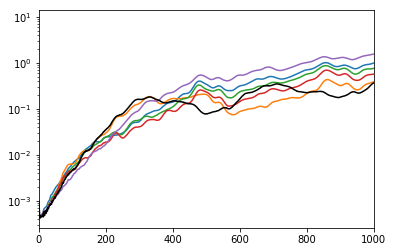

In [37]:
for mse in mse_list:
    plt.semilogy(t_list, mse)
plt.semilogy(mse_regular, 'k')
plt.xlim([0,1000])

In [49]:
print(step_size_list)
print(noise_list)
print(len(step_size_list))

[4, 4, 4, 4, 4]
[0.1, 0.1, 0.1, 0.1, 0.1]
5


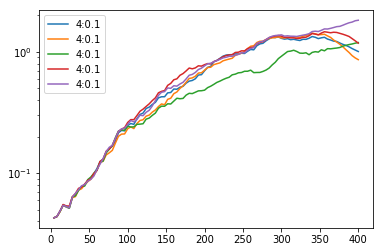

In [51]:
error = 0.2
for i in range(len(mse_list)):
#     if noise_list[i] == error:
        plt.semilogy(t_list_all[i][:100], mse_list[i][:100], label = str(step_size_list[i]) + ":"+ str(noise_list[i]))
    
# plt.title("error = " + str(error))
plt.legend()

In [58]:
# load model from regular way
models = list()
model_dir_regular = '../../models/VanDerPol'
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    model1 = torch.load(os.path.join(model_dir, model_name), map_location='cpu')
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
model1.device = 'cpu'
# model1._modules['small']._modules['activation'] = torch.nn.ReLU()
# model1._modules['large']._modules['activation'] = torch.nn.ReLU()
  
    
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

y_preds = model1.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=points)


print(points)

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = model1.forward(torch.tensor(test_data[:, 0]).float(), step_size)#, 'small')
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = model1.forward(y_preds)#, 'small')
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_pred_list[plt_idx,:, 1])
plt.plot(t_list, y_pred_list[plt_idx,:, 0])

plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4_model1 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4_model1)

mse_list.append(mse4_model1)
step_size_list.append(step_size)
noise_list.append(noise)
t_list_all.append(t_list)

TypeError: forward() missing 1 required positional argument: 'step_size'

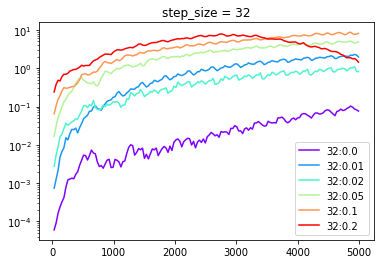

In [448]:
step_size = 32
color = iter(plt.cm.rainbow(np.linspace(0, 1, 6)))
for i in range(len(mse_list)):
    if step_size_list[i] == step_size:
        c = next(color)
        plt.semilogy(t_list_all[i], mse_list[i], label = str(step_size_list[i]) + ":"+ str(noise_list[i]), c=c)
    
plt.title("step_size = " + str(step_size))
plt.legend()

In [219]:
step_size_list

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [56]:
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

y_preds = model1.uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=points)

# print(points)

# t_list = np.zeros(points)
# y_pred_list = np.zeros((320, points, 2))

# t+= step_size
# y_preds = model2.forward(torch.tensor(test_data[:, 0]).float(), 'small')
# y_pred_list[:,0] = y_preds.detach().numpy()
# t_list[0] = t
# print(y_preds.shape)

# for j in range(points-1):
#     t+= step_size
#     y_preds = model2.forward(y_preds, 'small')
    
#     y_pred_list[:,j+1] = y_preds.detach().numpy()
#     t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_preds[plt_idx,:, 1])
plt.plot(t_list, y_preds[plt_idx,:, 0])

plt.plot(t_list, y_preds[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, y_preds[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4_model2 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4_model2)

TypeError: forward() missing 1 required positional argument: 'step_size'

1250
torch.Size([320, 2])


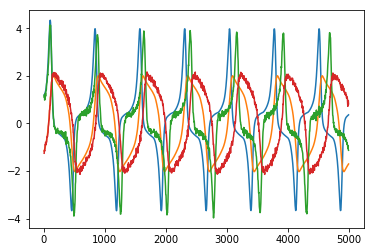

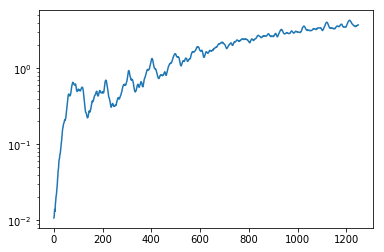

In [133]:
#want to find mse


timesteps = 5000

y_pred_list = list()
t_list = list()
# step_size = 8
t = 0

points = timesteps // step_size

print(points)

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = model_regular.forward(torch.tensor(test_data[:, 0]).float())
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = model_regular.forward(y_preds)
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    
    
plt_idx = 1

plt.plot(t_list, y_pred_list[plt_idx,:, 1])
plt.plot(t_list, y_pred_list[plt_idx,:, 0])

plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])

# print(test_data[:,:804:4].shape)
mse4__regular = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list4 = t_list
# plt.xlim([0,1000])
plt.show()

plt.semilogy(mse4__regular)

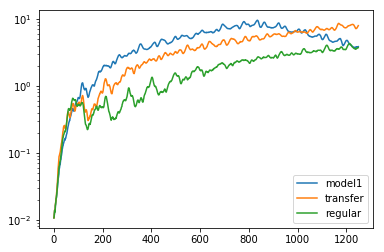

In [134]:
plt.semilogy(mse4_model1, label = "model1")
plt.plot(mse4_model2, label = "transfer")
plt.plot(mse4__regular, label = "regular")
plt.legend()

In [39]:
#want to find mse

y_pred_list = list()
t_list = list()
step_size = 16
t = 0

points = timesteps // step_size

t_list = np.zeros(points)
y_pred_list = np.zeros((320, points, 2))

t+= step_size
y_preds = models[0].forward(torch.tensor(test_data[:, 0]).float(), 'large')
y_pred_list[:,0] = y_preds.detach().numpy()
t_list[0] = t
print(y_preds.shape)

for j in range(points-1):
    t+= step_size
    y_preds = models[0].forward(y_preds, 'large')
    
    y_pred_list[:,j+1] = y_preds.detach().numpy()
    t_list[j+1] = t
    

print(t_list.shape)
print(y_pred_list.shape)

plt.plot(t_list, y_pred_list[0,:, 1])
plt.plot(t_list, y_pred_list[0,:, 0])

plt.plot(t_list, test_data[0,t_list.astype(int), 1])
plt.plot(t_list, test_data[0,t_list.astype(int), 0])
mse8 = np.mean((y_pred_list - test_data[:,t_list.astype(int)])**2, axis = (0,2))
t_list8 = t_list
plt.show()

plt.semilogy(mse8)

IndexError: list index out of range

(0, 1000)

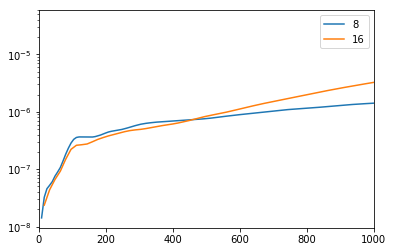

In [87]:
plt.semilogy(t_list4, mse4, label = "8")
plt.semilogy(t_list8, mse8, label = "16")
plt.legend()

plt.xlim([0, 1000])

# plt.ylim([1e-2, 10])

model_D8_noise0.0.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

Text(0.5,1,'Noise explore of Hyperbolic: step_size = 8')

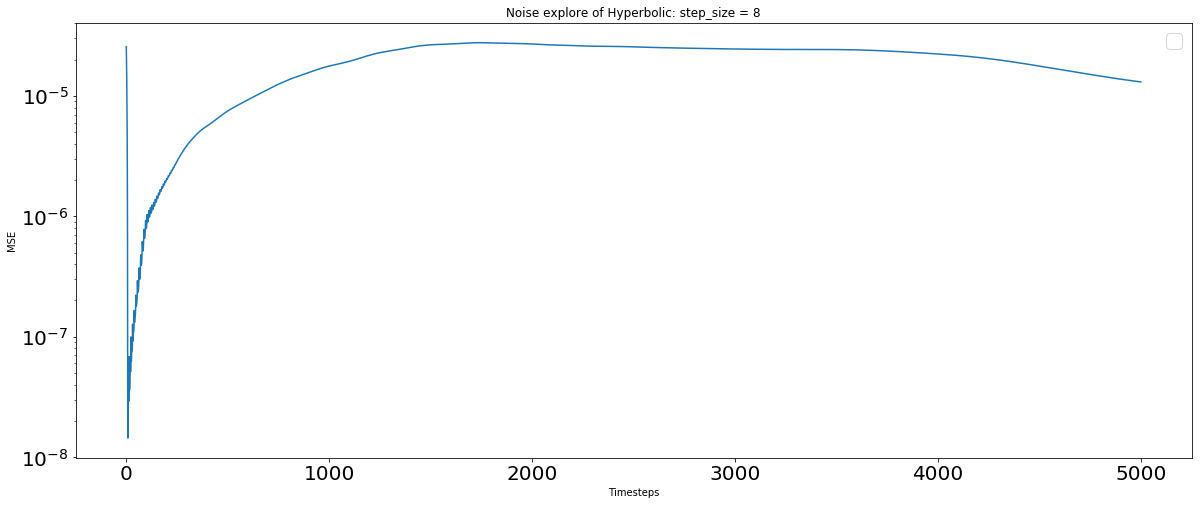

In [72]:
#want to plot with regular way too

step_size = 8
model_dir_regular = os.path.join('../../models/', system)
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

#graph for d1

mse_list_big = list()
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(models))))
# for k in range(len(preds_mse)):
#     err = preds_mse[k]
#     mean = err.mean(0).detach().numpy()
    
#     plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}'.format(step_sizes[k]*dt))


n_steps = 5000
for i in range(len(models)):
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
    rgb = next(colors)
    y_preds = models[i].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
#     plt.plot(y_preds[0,:,0].cpu().detach().numpy())
#     plt.plot(y_preds[0,:,1].cpu().detach().numpy())

#     plt.plot(test_data[0,1:n_steps,0])#.cpu().detach().numpy())
#     plt.plot(test_data[0,1:n_steps,1])#.cpu().detach().numpy())
# # plt.show()

# print((y_preds_2 - test_data[:,1:,:]).shape)

# print(((y_preds_2 - test_data[:,1:,:])**2).shape)

    mse_regular = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))
    mse_list_big.append(mse_regular)

    plt.semilogy(mse_regular)#, label = str(noise_levels[i]*100) + "%", color=rgb)

plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylim([1e-2, 10])
plt.ylabel("MSE")
plt.xlabel("Timesteps")
plt.title("Noise explore of " + system + ": step_size = "+ str(step_size))

model_D16_noise0.0.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/multiscale_HiTS_depends/src/ResNet.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

Text(0.5,1,'Noise explore of Hyperbolic: step_size = 16')

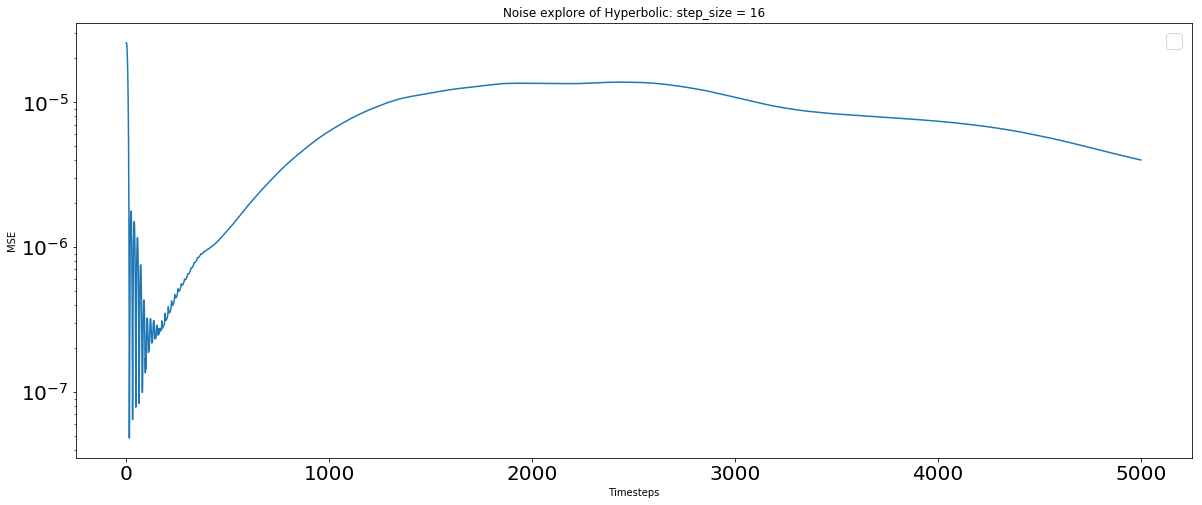

In [73]:
#want to plot with regular way too

step_size = 16
model_dir_regular = os.path.join('../../models/', system)
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir_regular, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

#graph for d1

mse_list_big = list()
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(models))))
# for k in range(len(preds_mse)):
#     err = preds_mse[k]
#     mean = err.mean(0).detach().numpy()
    
#     plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}'.format(step_sizes[k]*dt))


n_steps = 5000
for i in range(len(models)):
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
    rgb = next(colors)
    y_preds = models[i].uni_scale_forecast(torch.tensor(test_data[:, 0, :]).float(), n_steps=n_steps)
#     plt.plot(y_preds[0,:,0].cpu().detach().numpy())
#     plt.plot(y_preds[0,:,1].cpu().detach().numpy())

#     plt.plot(test_data[0,1:n_steps,0])#.cpu().detach().numpy())
#     plt.plot(test_data[0,1:n_steps,1])#.cpu().detach().numpy())
# # plt.show()

# print((y_preds_2 - test_data[:,1:,:]).shape)

# print(((y_preds_2 - test_data[:,1:,:])**2).shape)

    mse_regular8 = torch.mean((y_preds - test_data[:,1:n_steps+1,:])**2, axis = (0,2))
    mse_list_big.append(mse_regular8)

    plt.semilogy(mse_regular8)#, label = str(noise_levels[i]*100) + "%", color=rgb)

plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylim([1e-2, 10])
plt.ylabel("MSE")
plt.xlabel("Timesteps")
plt.title("Noise explore of " + system + ": step_size = "+ str(step_size))

312
torch.Size([313])


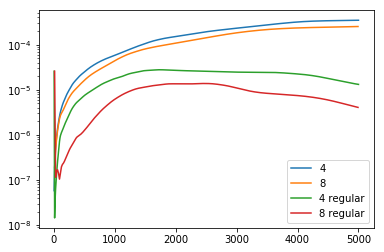

In [75]:
plt.semilogy(t_list4, mse4, label = "4")
plt.semilogy(t_list8, mse8, label = "8")

plt.semilogy(t_list4, mse_regular[::8], label = "4 regular")
print(len(t_list8))
print(mse_regular8[::16].shape)
plt.semilogy(t_list8, mse_regular8[:-10:16], label = "8 regular")
plt.legend()

# plt.xlim([0, 200])

# plt.ylim([1e-2, 1])

In [14]:
mse4.shape

(1250,)

In [24]:

import torch
import numpy as np
import scipy.interpolate
from utils_multiscale import DataSet
import time
def vectorized_multi_scale_forecast(self, x_init, n_steps, step_sizes = [8,4]):
        """
        :param x_init: initial state torch array of shape n_test x n_dim
        :param n_steps: number of steps forward in terms of dt
        :param models: a list of models
        :return: a torch array of size n_test x n_steps x n_dim,
                 a list of indices that are not achieved by interpolations
        """
        # sort models by their step sizes (decreasing order)
#         step_sizes = [model.step_size for model in models]
#         step_sizes = 
#         models = [model for _, model in sorted(zip(step_sizes, models), reverse=True)]

        

        # we assume models are sorted by their step sizes (decreasing order)
        n_test, n_dim = x_init.shape
        device = 'cpu'#'cuda' if torch.cuda.is_available() else 'cpu'
        indices = list()
        extended_n_steps = n_steps + step_sizes[0]
        preds = torch.zeros(n_test, extended_n_steps + 1, n_dim).float().to(device)

        # vectorized simulation
        indices.append(0)
        preds[:, 0, :] = x_init
        total_step_sizes = n_steps
#         for model in models:
        type_models = ['large', 'small']
        for i in [0,1]:
            step_size = step_sizes[i]
            type_model = type_models[i]
            n_forward = int(total_step_sizes/step_size)
            y_prev = preds[:, indices, :].reshape(-1, n_dim)
            indices_lists = [indices]
            for t in range(n_forward):
                y_next = self.forward(y_prev, type_model)
                shifted_indices = [x + (t + 1) * step_size for x in indices]
                indices_lists.append(shifted_indices)
                preds[:, shifted_indices, :] = y_next.reshape(n_test, -1, n_dim)
                y_prev = y_next
            indices = [val for tup in zip(*indices_lists) for val in tup]
            total_step_sizes = step_size - 1

        # simulate the tails
        last_idx = indices[-1]
        y_prev = preds[:, last_idx, :]
        while last_idx < n_steps:
            last_idx += step_size[-1]
            type_model = type_models[-1]
            y_next = mself.forward(y_prev, type_model)
            preds[:, last_idx, :] = y_next
            indices.append(last_idx)
            y_prev = y_next

        print(preds.shape)
        plt.plot(preds[plt_idx,:,0].detach().numpy())
        plt.plot(preds[plt_idx,:,1].detach().numpy())
        
        
        plt.plot(t_list, y_pred_list[plt_idx,:, 1])
        plt.plot(t_list, y_pred_list[plt_idx,:, 0])

        plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 1])
        plt.plot(t_list, test_data[plt_idx,t_list.astype(int), 0])
        plt.xlim([0,1000])

        # interpolations
        sample_steps = range(1, n_steps+1)
        valid_preds = preds[:, indices, :].detach().numpy()
        cs = scipy.interpolate.interp1d(indices, valid_preds, kind='lin/ear', axis=1)
        y_preds = torch.tensor(cs(sample_steps)).float()

        return y_preds
    
step_size = 4
# load models
models = list()
# for noise in noise_levels:
try:
    model_name = 'model_D{}_noise{}.pt'.format(step_size, noise)
    print(model_name)
    models.append(torch.load(os.path.join(model_dir, model_name), map_location='cpu'))
except:
    print("not found")
#     break

# fix model consistencies trained on gpus (optional)
for model in models:
    model.device = 'cpu'
    model._modules['small']._modules['activation'] = torch.nn.ReLU()
    model._modules['large']._modules['activation'] = torch.nn.ReLU()
  

model_D4_noise0.05.pt


/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'Resnet_multiscale.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kjohnst/.local/lib/python3.6/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's sourc

torch.Size([320, 1009, 2])


NotImplementedError: lin/ear is unsupported: Use fitpack routines for other types.

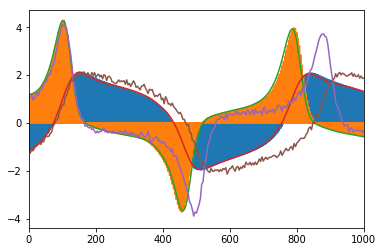

In [25]:
y_preds = vectorized_multi_scale_forecast(models[0], torch.tensor(test_data[:, 0]).float(), 1000)